# Consideraciones  generales
Para una correcta participación en la competencia **Data Thriatlon** sigue este formato de notebook propuestó por el equipo de data de Platzi. Esto ayudará en la calificación de tu notebook.

Secciones del notebook:

* Extracción de datos adicionales (0-20%)
* Limpieza y transformación de datos. (0-20%)
* Analisís exploratorio (*analytics, data visualization y storytelling*). (0-60%)
* Modelo (opcional).

*Para revisar las reglas de la competencia ve a este [blogpost](https://platzi.com/blog/olimpiadas-data-triathlon/).

# ¿Qué hay en los datos?

En los datos encontrarás información de las **exportaciones e importaciones de Colombia de 1962 a 2017**. Fueron extraídos del [OEC: The Observatory of Economic Complexity](https://legacy.oec.world/en/).

Tu labor será desarrollar un análisis exploratorio para encontrar insights valiosos a partir de esos datos y otros que recopiles.



## Preguntas

Para el desarrollo de tu análisis puedes resolver las siguientes preguntas:

1. ¿Cuál es el top 10 países a los que Colombia exporta sus productos y su evolución con respecto al tiempo?
2. ¿Cuál es el top 10 países de los que Colombia importa sus productos y su evolución con respecto al tiempo?
3. ¿Existe algún producto que debido a cambios económicos en la oferta/demanda halla causado un decremento en el volumen de dinero que se mueve con él?
4. ¿Cuáles sectores económicos tienen mayor importancia en las exportaciones de Colombia y por qué?

**También puedes resolver preguntas que a ti se te ocurran.**

# Extracción de datos adicionales (0-20%)

Para extraer información adicional a la proporcionada por Platzi puedes extraerla directamente de la fuente de datos original. El dataset cuenta con la información extraída del *OEC: The Observatory of Economic Complexity*, específicamente de la versión legacy la cual permite la descarga de archivos a partir de una URL y de la API expuesta por ellos.

- [https://legacy.oec.world/en/resources/data/](https://legacy.oec.world/en/resources/data/)
- [https://legacy.oec.world/api/](https://legacy.oec.world/api/)

**Para tu análisis recolecta más datos de esta y otras fuentes que veas necesarias.**

# Limpieza y transformación de datos (0-20%)

Para la limpieza de datos puedes utilizar herramientas como Pandas y numpy con el fin de limpiar y estructurar todo tipo de datos nulos o vacíos que no sean necesarios para el análisis de los datos requeridos.

In [49]:
#@title Requeriments
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno

In [2]:
#@title Settings
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/data/Dataset_Data_Triathlon/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@title Main data sets Load
products = pd.read_csv(path+'products_sitc_rev2.csv', sep= '|')
print('products Data set have a dimension of ',products.shape,' records and columns respectively')
groups = pd.read_csv(path+'groups_sitc_rev2.csv', sep= '|')
print('groups Data set have a dimension of ',groups.shape,' records and columns respectively')
countrys = pd.read_csv(path+'country_names.csv', sep= '|')
print('countrys Data set have a dimension of ',countrys.shape,' records and columns respectively')
imports = pd.read_csv(path+'colombia_imports.csv', sep= '|')
print('imports Data set have a dimension of ',imports.shape,' records and columns respectively')
exports = pd.read_csv(path+'colombia_exports.csv', sep= '|')
print('exports Data set have a dimension of ', exports.shape, ' records and columns respectively')

products Data set have a dimension of  (988, 4)  records and columns respectively
groups Data set have a dimension of  (65, 3)  records and columns respectively
countrys Data set have a dimension of  (263, 4)  records and columns respectively
imports Data set have a dimension of  (775902, 7)  records and columns respectively
exports Data set have a dimension of  (799406, 7)  records and columns respectively


In [22]:
 #@title Basic Dataset Info
print('Here we can see some basic info from the differents data sets')
print(' ')
print('Product')
print(' ')
products.info()
print(' ')
print('groups')
print(' ')
groups.info()
print(' ')
print('countrys')
print(' ')
countrys.info()
print(' ')
print('imports')
print(' ')
imports.info()
print(' ')
print('exports')
print(' ')
exports.info()

Here we can see some basic info from the differents data sets
 
Product
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  988 non-null    int64 
 1   id          988 non-null    object
 2   sitc        988 non-null    int64 
 3   name        988 non-null    object
dtypes: int64(2), object(2)
memory usage: 31.0+ KB
 
groups
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  65 non-null     int64 
 1   id          65 non-null     int64 
 2   category    65 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.6+ KB
 
countrys
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------

### First goal
In this first step we have the goal of make a full data set with all the fields available, so we can use the primary and outsiders keys given in each fields  based on the transactional datasets as the exports and imports files

Let's go to fit this data with this steps
* Labeling the transactional data sets
* Add the country names
* Add the product names



#### Labeling the transactional data sets

In [4]:
imports['Transaction'] = 'import'
imports

,Unnamed: 0,year,origin,dest,sitc4,export_val,import_val,Transaction
0,11564,1962,civ,col,712,13000.0,0.0,import
1,11565,1962,civ,col,1210,0.0,12000.0,import
2,17741,1962,cod,col,2925,2000.0,0.0,import
3,20216,1962,cog,col,2925,2000.0,0.0,import
4,25005,1962,dza,col,1210,0.0,112000.0,import
...,...,...,...,...,...,...,...,...
775897,124923798,2017,ury,col,6658,8658.0,NaN,import
775898,124923799,2017,ury,col,8924,NaN,4285.5,import
775899,124923800,2017,ury,col,8928,3816.5,25667.5,import
775900,124923801,2017,ury,col,8972,500.0,5306.0,import


In [5]:
exports['Transaction'] = 'export'
exports

,Unnamed: 0,year,origin,dest,sitc4,export_val,import_val,Transaction
0,761444,1962,col,civ,712,0.0,13000.0,export
1,761445,1962,col,civ,1210,12000.0,0.0,export
2,761446,1962,col,cod,2925,0.0,2000.0,export
3,761447,1962,col,cog,2925,0.0,2000.0,export
4,761448,1962,col,dza,1210,112000.0,0.0,export
...,...,...,...,...,...,...,...,...
799401,124876488,2017,col,ury,6658,NaN,8658.0,export
799402,124876489,2017,col,ury,8924,4285.5,NaN,export
799403,124876490,2017,col,ury,8928,25667.5,3816.5,export
799404,124876491,2017,col,ury,8972,5306.0,500.0,export


In [6]:
balance_payments = imports.append(exports)
balance_payments

,Unnamed: 0,year,origin,dest,sitc4,export_val,import_val,Transaction
0,11564,1962,civ,col,712,13000.0,0.0,import
1,11565,1962,civ,col,1210,0.0,12000.0,import
2,17741,1962,cod,col,2925,2000.0,0.0,import
3,20216,1962,cog,col,2925,2000.0,0.0,import
4,25005,1962,dza,col,1210,0.0,112000.0,import
...,...,...,...,...,...,...,...,...
799401,124876488,2017,col,ury,6658,NaN,8658.0,export
799402,124876489,2017,col,ury,8924,4285.5,NaN,export
799403,124876490,2017,col,ury,8928,25667.5,3816.5,export
799404,124876491,2017,col,ury,8972,5306.0,500.0,export


#### Add the country names field

In [7]:
countrys.columns = ['Unnamed: 0','id','origin','name']
balance_payments = balance_payments.merge(countrys[['origin','name']], on='origin', how='left')
balance_payments.columns = ['Unnamed: 0', 'year', 'origin', 'dest', 'sitc4', 'export_val','import_val', 'Transaction', 'name_origin']
countrys.columns = ['Unnamed: 0','id','dest','name']
balance_payments = balance_payments.merge(countrys[['dest','name']], on='dest', how='left')
balance_payments.columns = ['Unnamed: 0', 'year', 'origin', 'dest', 'sitc', 'export_val','import_val', 'Transaction', 'name_origin', 'name_dest']
balance_payments

,Unnamed: 0,year,origin,dest,sitc,export_val,import_val,Transaction,name_origin,name_dest
0,11564,1962,civ,col,712,13000.0,0.0,import,Cote d'Ivoire,Colombia
1,11565,1962,civ,col,1210,0.0,12000.0,import,Cote d'Ivoire,Colombia
2,17741,1962,cod,col,2925,2000.0,0.0,import,Democratic Republic of the Congo,Colombia
3,20216,1962,cog,col,2925,2000.0,0.0,import,Republic of the Congo,Colombia
4,25005,1962,dza,col,1210,0.0,112000.0,import,Algeria,Colombia
...,...,...,...,...,...,...,...,...,...,...
1575303,124876488,2017,col,ury,6658,NaN,8658.0,export,Colombia,Uruguay
1575304,124876489,2017,col,ury,8924,4285.5,NaN,export,Colombia,Uruguay
1575305,124876490,2017,col,ury,8928,25667.5,3816.5,export,Colombia,Uruguay
1575306,124876491,2017,col,ury,8972,5306.0,500.0,export,Colombia,Uruguay


#### Add the product names

In [8]:
balance_payments = balance_payments.merge(products[['sitc','name']], on='sitc', how='left')
balance_payments.columns = ['Unnamed: 0', 'year', 'origin', 'dest', 'sitc', 'export_val','import_val', 'Transaction', 'name_origin', 'name_dest', 'name_product']
balance_payments.drop(['Unnamed: 0'], axis=1, inplace=True)
balance_payments

,year,origin,dest,sitc,export_val,import_val,Transaction,name_origin,name_dest,name_product
0,1962,civ,col,712,13000.0,0.0,import,Cote d'Ivoire,Colombia,Coffee Extracts
1,1962,civ,col,1210,0.0,12000.0,import,Cote d'Ivoire,Colombia,Tobacco unmanufactured; tobacco refuse
2,1962,cod,col,2925,2000.0,0.0,import,Democratic Republic of the Congo,Colombia,Planting Seeds and Spores
3,1962,cog,col,2925,2000.0,0.0,import,Republic of the Congo,Colombia,Planting Seeds and Spores
4,1962,dza,col,1210,0.0,112000.0,import,Algeria,Colombia,Tobacco unmanufactured; tobacco refuse
...,...,...,...,...,...,...,...,...,...,...
1575303,2017,col,ury,6658,NaN,8658.0,export,Colombia,Uruguay,Miscellaneous Articles of Glass
1575304,2017,col,ury,8924,4285.5,NaN,export,Colombia,Uruguay,Cards and Decals
1575305,2017,col,ury,8928,25667.5,3816.5,export,Colombia,Uruguay,Miscellaneous Printed Matter
1575306,2017,col,ury,8972,5306.0,500.0,export,Colombia,Uruguay,Imitation Jewellery


#### Results

Finally we can check in one sight the completeness level of all columns

Text(199.0, 0.5, 'rows')

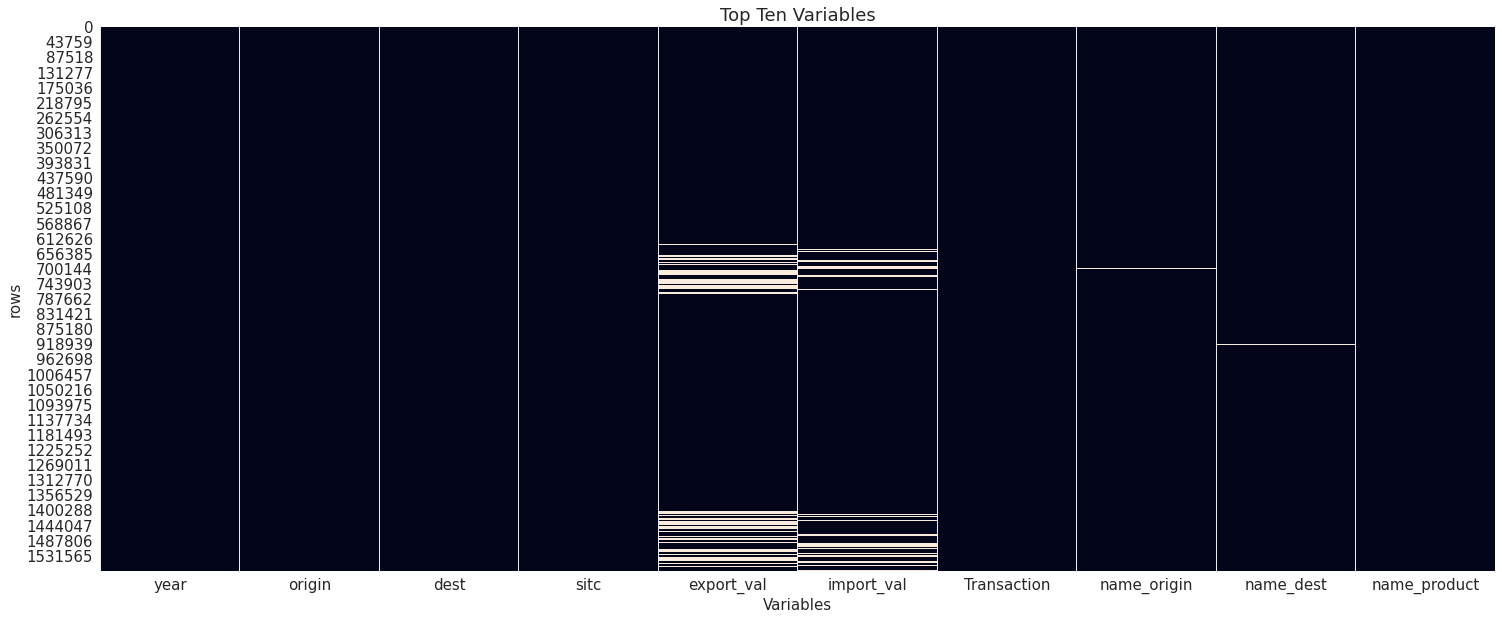

In [9]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
sns.heatmap(balance_payments.isnull(), cbar=False)
plt.title("Top Ten Variables")
plt.xlabel('Variables')
plt.ylabel('rows')

# Análisis exploratorio (*analytics, data visualization y storytelling* (0-60%)

El análisis exploratorio es parte fundamental para responder las preguntas propuestas por el equipo de data scientists de Platzi. 

* Mantén un código, visualizaciones y storytelling ordenados. 
* Muestra gráficas inline haciendo uso de herramientas como Matplotlib, Seaborn y otras. 
* En el storytelling la narrativa y la visualización deben tener sentido, procura que las gráficas sean visibles, aporten valor a responder las preguntas y sean lo más descriptivas posibles. 
* Además agrega textos que faciliten la narrativa del storytelling.

#### First let's go to explore the basic info about the last seccion results

In [10]:
#@title #####'balance_payments' dataset
balance_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575308 entries, 0 to 1575307
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   year          1575308 non-null  int64  
 1   origin        1575308 non-null  object 
 2   dest          1575308 non-null  object 
 3   sitc          1575308 non-null  int64  
 4   export_val    1447814 non-null  float64
 5   import_val    1475726 non-null  float64
 6   Transaction   1575308 non-null  object 
 7   name_origin   1574258 non-null  object 
 8   name_dest     1571389 non-null  object 
 9   name_product  1575308 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 132.2+ MB


In [11]:
#@title #####Store the variables by type to use them easily
features = pd.DataFrame(balance_payments.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index

##### Let's go to explore basic description for all kind of data

In [12]:
#@title #####Numerical data
features_num = features_f.append(features_i)
balance_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1575308.0,1.997857e+03,1.417671e+01,1962.0,1989.0,2001.0,2009.00,2.017000e+03
sitc,1575308.0,6.222229e+03,2.339567e+03,10.0,5514.0,6760.0,7723.00,9.710000e+03
export_val,1447814.0,1.074322e+06,3.221065e+07,0.0,0.0,3308.0,73794.75,1.385914e+10
import_val,1475726.0,1.106083e+06,3.493362e+07,0.0,0.0,3344.0,73000.00,1.580013e+10


In [70]:
#@title #####Categorical data
balance_payments[features_o].describe(include='all').T

,count,unique,top,freq
origin,1575308,245,col,801096
dest,1575308,250,col,777592
Transaction,1575308,2,export,799406
name_origin,1574258,241,Colombia,801096
name_dest,1571389,243,Colombia,777592
name_product,1575308,936,Coffee,6433


In [77]:
#@title ##### Null values
Nulos = 100*balance_payments.isnull().sum()/balance_payments.shape[0]
Nulos = pd.DataFrame(Nulos)
Nulos.columns = ['% Null values']
Nulos.sort_values(by='% Null values', ascending=False, inplace=True)
Nulos

,% Null values
export_val,8.093274
import_val,6.321430
name_dest,0.248777
name_origin,0.066654
year,0.000000
origin,0.000000
dest,0.000000
sitc,0.000000
Transaction,0.000000
name_product,0.000000


##### Now we can watch the distribution of numerical data

In [ ]:
#@title Histograms for the numerical distribution
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = features_num
plt.figure(figsize=(25,6*len(var_hist)/2))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(round(len(var_hist)/2),2,i+1)
    sns.histplot(balance_payments, x=var, color='y', kde=True)
    plt.xlabel(var)
    plt.ylabel("count")

In [27]:
features_num

Index(['export_val', 'import_val', 'year', 'sitc'], dtype='object')

In [ ]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(25,6))
sns.histplot(balance_payments, x='export_val', color='y', kde=True)
plt.xlabel(var)
plt.ylabel("count")

<b><font color=yellow size=4> Analisis de sentimientos</font></b>

##### Now we can watch the visualization of categorical data

In [42]:
pd.DataFrame(balance_payments['Transaction'].value_counts())

,Transaction
export,799406
import,775902


In [ ]:
plt.style.use("Solarize_Light2")
fig, axs = plt.subplots(1,1,figsize=(15,5)
a = pd.DataFrame(balance_payments['Transaction'].value_counts())
axs.pie(np.array(list(a[0])),
    labels=np.array(list(a.index)),
    autopct='%1.1f%%',
    shadow=False,
    )
axs.set(title='Transaction')

In [56]:
pd.DataFrame(balance_payments['name_product'].value_counts()).head(28)

,name_product
Coffee,6433
Miscellaneous Printed Matter,6301
Printed Books and Maps,5948
Miscellaneous Non-Electrical Machinery Parts,5889
Luggage,5878
Medicaments,5850
Fasteners,5782
Miscellaneous Hand Tools,5781
Medical Instruments,5734
Footwear,5477


In [ ]:
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = features_o
plt.figure(figsize=(25,25)
a = pd.DataFrame(balance_payments['name_product'].value_counts()).head(28)
y = np.array(list(a.index))
x = np.array(list(a['name_product']))
sns.barplot(x=x, y=y, palette="rocket")
plt.title('name_product')

In [52]:
pd.DataFrame(balance_payments[balance_payments['Transaction'] == 'import']['name_origin'].value_counts()).head(28)

,name_origin
United States,34449
Germany,26632
Spain,23215
Italy,22605
France,22156
United Kingdom,21957
Ecuador,20292
Venezuela,20163
Brazil,19974
Canada,19123


In [ ]:
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = features_o
plt.figure(figsize=(25,25*))
a = pd.DataFrame(balance_payments[balance_payments['Transaction'] == 'import']['name_origin'].value_counts()).head(28)
y = np.array(list(a.index))
x = np.array(list(a['name_product']))
sns.barplot(x=x, y=y, palette="rocket")
plt.title('Origin country')

In [55]:
pd.DataFrame(balance_payments[balance_payments['Transaction'] == 'export']['name_dest'].value_counts()).head(28)

,name_dest
United States,34456
Germany,26626
Spain,23139
Italy,22835
France,22256
United Kingdom,22197
Venezuela,21542
Ecuador,20317
Brazil,19956
Japan,19300


In [ ]:
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = features_o
plt.figure(figsize=(25,25*))
a = pd.DataFrame(balance_payments[balance_payments['Transaction'] == 'export']['name_dest'].value_counts()).head(28)
y = np.array(list(a.index))
x = np.array(list(a['name_product']))
sns.barplot(x=x, y=y, palette="rocket")
plt.title('Destiny country')

# Modelo (opcional)

Si necesitas agregar un modelo para mejorar tu análisis hazlo en esta sección del notebook. **La evaluación será contada como parte del análisis exploratorio y es completamente opcional**.

- En el desarrollo del modelo se requiere una organización del código y la estructuración del propio modelo. Las celdas que ejecuten entrenamientos o búsqueda de parámetros deben estar con **verbose 0**, esto con el fin de no ensuciar la salida de código y agilizar su revisión.
